# 8 steps of Machine Learning
1. Data gathering
2. data preprocessing
3. Exploratory Data Analysis (EDA)
4. Feature engineering/selection
5. Training model
6. Test model/Model evaluation
7. Hyper Parameter tuning
8. Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Data gathering

In [ ]:
data=pd.read_csv('FuelConsumption.csv')
data.head()

Check the basic info and missing values

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
# Return DataFrame with duplicate rows removed.
data.drop_duplicates(inplace=True)

In [ ]:
# count categorical unique value from make column
data['MAKE'].value_counts()
data.MAKE.value_counts()

In [ ]:
# count categorical unique value from MODEL column
data['MODEL'].value_counts()

In [ ]:
# count categorical unique value from VEHICLECLASS column
data['VEHICLECLASS'].value_counts()

In [ ]:
# count categorical unique value from TRANSMISSION  column
data['TRANSMISSION'].value_counts()

In [ ]:
data['FUELTYPE'].unique() # getting the name of unique value

In [ ]:
# count categorical unique value from FUELTYPE  column
data['FUELTYPE'].value_counts()

In [ ]:
data['MODELYEAR'].value_counts()

In [ ]:
# drop MODELYEAR COLUMN
data.drop(columns=['MODELYEAR'], inplace=True)

Statistical Analysis

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MAKE,1067.0,17.223055,10.937264,0.0,7.00,15.0,26.00,38.0
MODEL,1067.0,331.014995,188.664368,0.0,173.00,324.0,502.50,662.0
VEHICLECLASS,1067.0,6.337395,5.095388,0.0,2.00,6.0,11.00,15.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
TRANSMISSION,1067.0,9.670103,6.673143,0.0,2.00,11.0,13.00,21.0
FUELTYPE,1067.0,2.269916,0.722374,0.0,2.00,2.0,3.00,3.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8


# 2. Data preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
# each column transform categorical to numerical value and  update to dataframe
for col in ['MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE']:
    data[col]=encoder.fit_transform(data[col]) 

In [ ]:
data

# 3. EDA

In [ ]:
sns.set(style='white')
plt.figure(figsize=(10,8))
plt.scatter(x=data['ENGINESIZE'],y=data['CO2EMISSIONS'])
plt.title('ENGINSIZE VS C02EMISSIONS')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='ENGINESIZE', y='CO2EMISSIONS', data=data)
plt.title('ENGINESIZE VE CO2EMISSIONS')
plt.show()

In [ ]:
sns.distplot(data.ENGINESIZE,kde=False)
data['ENGINESIZE'].plot(kind='hist') # hist/bar
data.ENGINESIZE.plot(kind='hist') # by this plot we can know the distribution of data over x axis

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(data=data)

<AxesSubplot:xlabel='ENGINESIZE'>

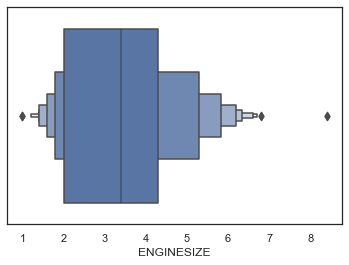

In [28]:
sns.boxenplot(data=data, x='ENGINESIZE', )